# INF8111 - Fouille de données


## TP1 AUTOMNE 2024 - Préparation de données




### Instructions de remise

#### Membres de l'équipe :
    - Alexandre Fournier (2147771) 1
    - William Martin (2148952) 2
    
#### Délivrable :

Vous devez soumettre ce notebook sur Moodle dans la boite de remise sous le nom TP1_NomDuMembre1_NomDuMembre2_NomDuMembre3.ipynb.

**NB**: Tout travail en retard sera pénalisé d'une valeur de 10\% par jour de retard.


## Introduction et objectifs

### Importation des différents modules

In [990]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install requests
# !pip install shap

# !pip3 install pandas
# !pip3 install numpy
# !pip3 install scikit-learn
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install plotly
# !pip3 install requests
# !pip3 install shap

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pylt
import matplotlib as plt

import plotly.express as px
import plotly as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model
import shap

from scipy.stats import norm

### Téléchargement des données

In [3]:
import requests
response = requests.get('https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/export?format=csv&gid=1150341366')
assert response.status_code == 200, 'Wrong status code'
# convert the csv to a pandas dataframe
with open('data.csv', 'w') as f:
    f.write(response.text)

df = pd.read_csv('data.csv')

Le but de ce notebook est d'effectuer le prétraitement du dataset [HousePricePrediction](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) qui pourra être par la suite être utilisé pour entraîner un modèle de prédiction de prix de maisons.

## Préparation des données

Plusieurs étapes sont nécessaires pour préparer un dataset pour la fouille des données
- **Nettoyage des données** :
    - Suppression des attributs inutiles
    - Gestion des valeurs manquantes
    - Gestion des valeurs aberrantes
- **Transformation des données** :
    - Encodage des données
    - Normalisation des données
- **Sélection des attributs** :
    - Suppression des attributs les plus fortement corrélés

## Sommaire

1. [Première observation des données](#1.-Première-observation-des-donnees)
2. [Nettoyage des données](#2.-Nettoyage-des-données)
   1. [Suppression des attributs inutiles](#2.1.-Suppression-des-attributs-inutiles)
   2. [Gestion des valeurs manquantes](#2.2.-Gestion-des-valeurs-manquantes)
   3. [Détection des valeurs aberrantes](#2.3.-Détection-des-valeurs-aberrantes)
3. [Transformation des données](#3.-Transformation-des-données)
   1. [Encodage des attributs de type `object`](#3.1.-Encodage-des-attributs-de-type-object)
   2. [Normalisation des données](#3.2.-Normalisation-des-données)
4. [Sélection des attributs](#4.-Sélection-des-variables)
   1. [Suppression des attributs corrélées](#4.1.-Suppression-des-variables-corrélées)
5. [Récapitulatif des procédés](#5.-Récapitulatif-des-prétraitements)
6. [Entrainement d'un modèle de régression linéaire](#6.-Récapitulatif-des-prétraitements)
    1. [Rappel du concept](#6.1.-Rappel-concept)
    2. [Application](#6.2.-Application)
    3. [Sélection des attributs importants](#6.3.-Sélection-des-attributs-importants)
7. [Méthode des écarts interquartiles ou IRQ](#7.-Récapitulatif-des-prétraitements)

## 1. Exploration des données (5 points)

Nous vous avons fourni le fichier *data.csv* avec l'exécution de la deuxième cellule. Il contient l'ensemble des données. Chaque ligne contient les données d'une vente. La description des attributs du dataset est la suivante:

| # | Feature Name | Description |
|---|--------------|-------------|
| 1 | Id           | Numéro de vente / To count the records. |
| 2 | MSSubClass   | Type de logement / Identifies the type of dwelling involved in the sale. |
| 3 | MSZoning     | Zonage / Identifies the general zoning classification of the sale. |
| 4 | LotArea      | Superficie du logement / Lot size in square feet. |
| 5 | LotConfig    | Configuration du logement / Configuration of the lot |
| 6 | BldgType     | Type de logement / Type of dwelling |
| 7 | OverallCond  | Etat général / Rates the overall condition of the house |
| 8 | YearBuilt    | Année de contruction / Original construction year |
| 9 | YearRemodAdd | Année de rénovation / Remodel date (same as construction date if no remodeling or additions). |
| 10| Exterior1st  | Type de revêtement extérieur / Exterior covering on house |
| 11| BsmtFinSF2   | Surface de vie / Type 2 finished square feet. |
| 12| TotalBsmtSF  | Surface totale de la base / Total square feet of basement area |
| 13| SalePrice    | Prix de vente à prédire / To be predicted |

On visualise le dataset pour avoir une idée de ce qu'il contient et des prétraitements à effectuer.

### 1.1 - Question 1 (2.5 points)

**Combien d'éléments contient le dataset ? Quelles sont les types des attributs du dataset ?**

In [4]:
#TODO
num_elements = df.size
print(f"Le nombre total d'éléments dans le dataset est: {num_elements}")

types = df.dtypes
print("Types des attributs du dataset :")
print(types)

Le nombre total d'éléments dans le dataset est: 37947
Types des attributs du dataset :
Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object


### 1.2 - Question 2 (2.5 points)

**Quelles sont les valeurs uniques des attributs de type `object` ?**

In [5]:
#TODO
object_col = df.select_dtypes(include=['object'])
for col in object_col:
    unique_values = object_col[col].unique()
    print(f"Valeurs uniques de la colonne '{col}': {unique_values}")

Valeurs uniques de la colonne 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Valeurs uniques de la colonne 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Valeurs uniques de la colonne 'BldgType': ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Valeurs uniques de la colonne 'Exterior1st': ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]


## 2. Nettoyage des données (30 points)

### 2.1 Suppression des attributs inutiles

### 2.1.1 - Question 3 (5 points)

**Pourquoi on peut supprimer l'attribut `Id` dans le cas de ce TP? Effectuez cette suppression.**

On peut supprimer l'attribut Id dans le cas de ce TP car cet attribut n'apporte pas d'informations pertinentes, il n'a pas de lien avec les caractéristiques de la maison et n'influe par sur le prix. Ainsi, il n'apporte rien de plus à l'analyse de données et encore moins au modèle de prédiction.

In [6]:
#TODO
df.drop('Id', axis=1, inplace=True)
display(df)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


### 2.2 Gestion des valeurs manquantes

Pour gérer les valeurs manquantes, plusieurs solutions s'offrent à nous :
- Remplacer par la valeur la plus fréquente (le mode)
- Remplacer par la valeur moyenne/médiane
- Suppression des lignes contenant des valeurs manquantes

Pour ce TP, nous utiliserons la dernière option car nous avons peu de valeurs manquantes.

#### 2.2.1 - Question 4 (2.5 points)

**Quels attributs contiennent des valeurs manquantes ?**

In [9]:
#TODO
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Attributs contenant des valeurs manquantes:")
print(missing_columns)

Attributs contenant des valeurs manquantes:
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


#### 2.2.2 - Question 5 (2.5 points)

On peut alors gérer les valeurs manquantes colonne par colonne. L'attribut `SalePrice` n'est pas pris en considération car les valeurs manquantes sont justement les valeurs que nous voulons prédire.

**Supprimer les lignes contenant les valeurs manquantes. Implémentez la fonction `delete_missing_values` qui retire ces données**.

In [10]:
def delete_missing_values(dataset):
    """
    This function deletes row whom a value is missing.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    data_except_pred = dataset.drop(columns=['SalePrice'])
    data_except_pred = data_except_pred.dropna()
    cleaned_dataset = dataset.loc[data_except_pred.index]
    
    return cleaned_dataset

In [12]:
df = delete_missing_values(df)
display(df)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


Les données manquantes pour la colonne `SalePrice` sont celles du dataset de test. On laisse donc ces valeurs manquantes car on veut appliquer le même prétraitement sur les données de test.

### 2.2.3 - Question 6 (10 points)

On veut néanmoins que les données d'entrainement suivent une distribution gaussienne.

**Implémenter le fonction `plot_hist`. Cette fonction doit permettre d'afficher la distribution des valeurs de l'attribut `SalePrice` ainsi que la loi normale de même moyenne et variance.**

In [28]:
def plot_hist(data):
    mean = np.mean(data)
    std = np.std(data)
    
    sns.histplot(data, color="green", stat="density", label='Distribution du prix de vente')
    
    xmin, xmax = pylt.xlim()
    line_points = np.linspace(xmin, xmax, 100)
    normal_distribution = norm.pdf(line_points, mean, std)
    pylt.plot(line_points, normal_distribution, linewidth=2, color="red", label='Loi normale')
    
    pylt.legend()
    pylt.show()

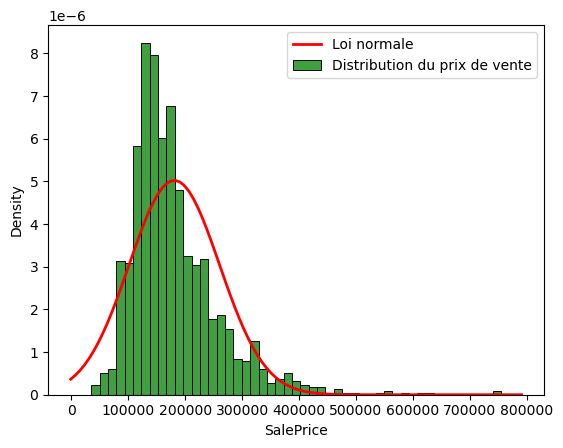

In [29]:
plot_hist(df['SalePrice'])

Vous devez obtenir une distribution des valeurs de `SalePrice` proches d'une distribution normale mais légèrement asymétrique. On peut alors appliquer une transformation logarithmique pour approcher d'une distribution normale symétrique.

**Effectuer cette transformation sur notre ensemble de données.**

In [30]:
#TODO
df['SalePrice'] = np.log(df['SalePrice'] + 1)

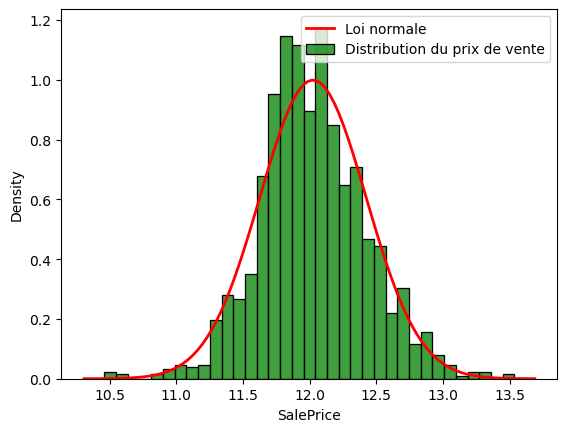

In [31]:
plot_hist(df['SalePrice'])

### 2.3 Détection des valeurs aberrantes

En pratique, la méthode de détection d'une valeur aberrante nécessite de se poser les questions suivantes:
- Quelles valeurs seraient incohérentes pour chaque colonne ?
- Quelles valeurs peuvent être problématiques pour l'utilisation de ces données ? Exemple: pour une régression linéaire, on préfère avoir des valeurs distribuées suivant une loi normale.

Avec ces éléments, on peut:
- Fixer des seuils de tolérance pour les valeurs aberrantes
- Utiliser des algorithmes de détection de valeurs aberrantes (ex: clustering, IRQ, [QTest](https://plotly.com/python/v3/outlier-test/), ...)

A noter que suivant les méthodes, les valeurs détectées comme aberrantes peuvent être différentes.

La méthode IRQ fait l'objet d'une partie bonus, en fin de ce notebook.

### 2.3.1 Question 7 (10 points)

Ici comme nous allons réaliser une régression linéaire, nous allons visuellement voir si certains points s'écartent franchement de la droite de régression.

On sait que l'on veut effectuer une régression linéaire pour prédire `SalePrice`. On peut donc visualiser les valeurs de chaque attribut en fonction de `SalePrice` pour détecter la présence de valeurs aberrantes.

**Implémenter la fonction `plot_line`. Elle doit permettre de visualiser la relation entre un attribut donné et `SalePrice`.**

In [62]:
def plot_line(attr):
    """
    Affiche la relation entre attr et SalePrice

    :param attr: attribut à comparer à SalePrice
    """
    pylt.figure(figsize=(10, 6))
    sns.regplot(x=attr, y='SalePrice', data=df, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
    
    pylt.title(f'Relation entre {attr} et SalePrice')
    pylt.xlabel(attr)
    pylt.ylabel('SalePrice')
    
    pylt.show()

**Afficher les relations de tous les attributs avec `SalePrice`. Peut-on y déceler des valeurs aberrantes ?**

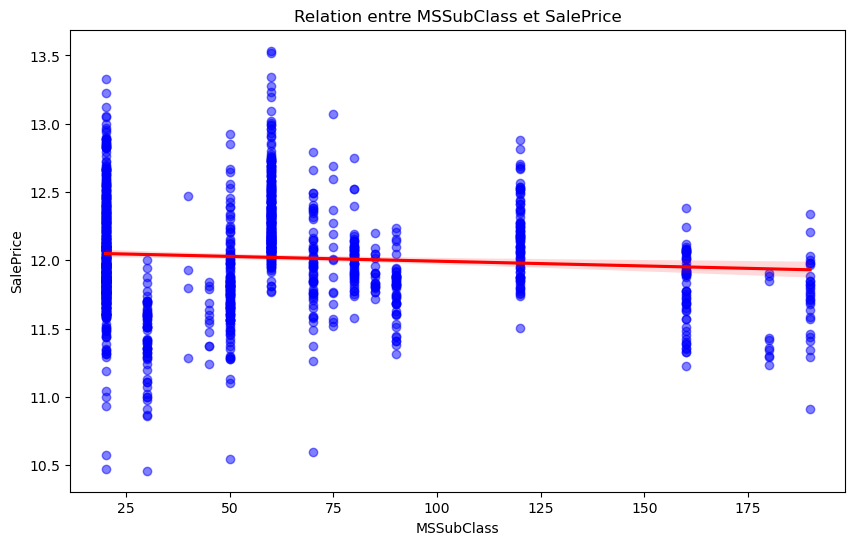

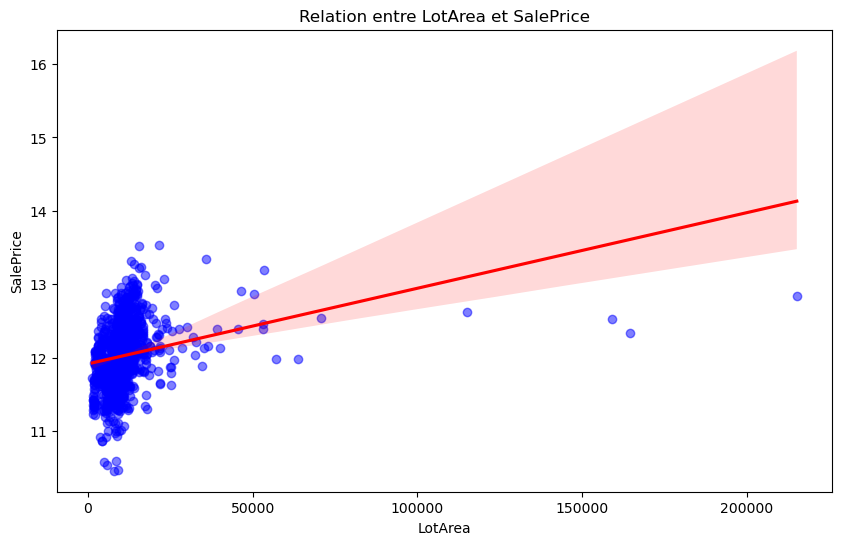

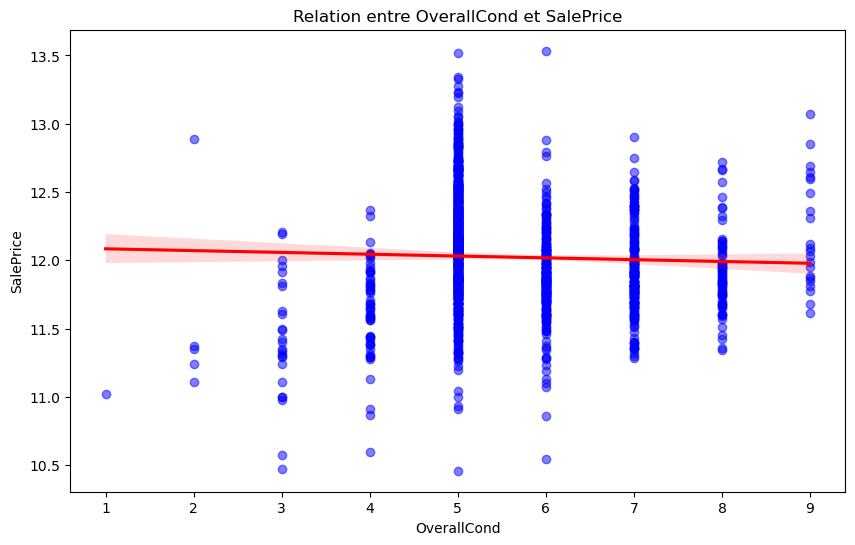

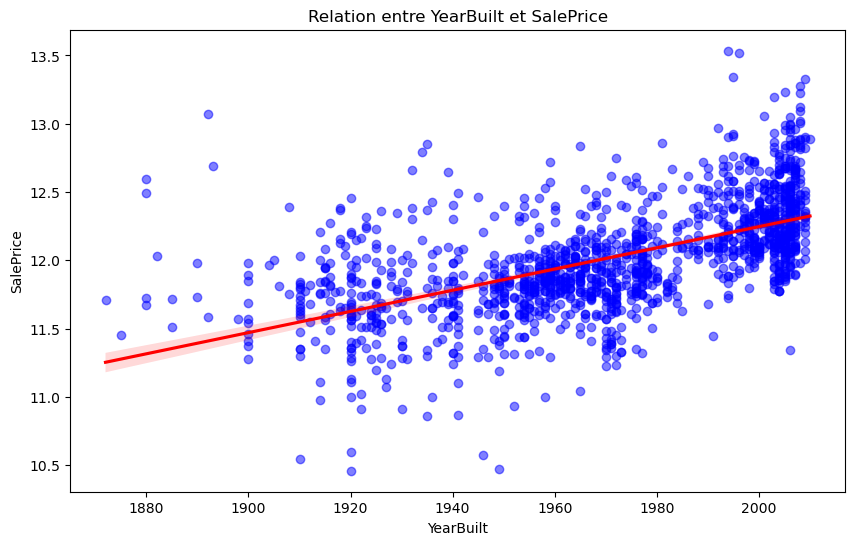

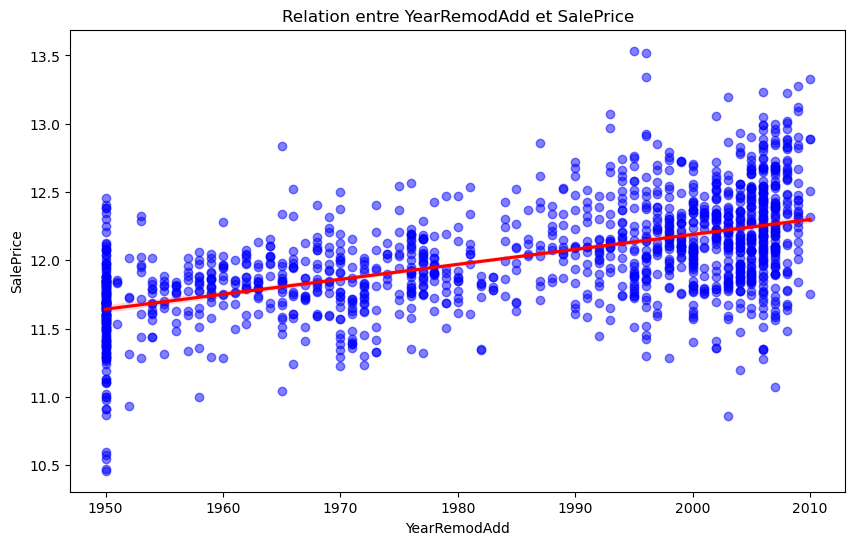

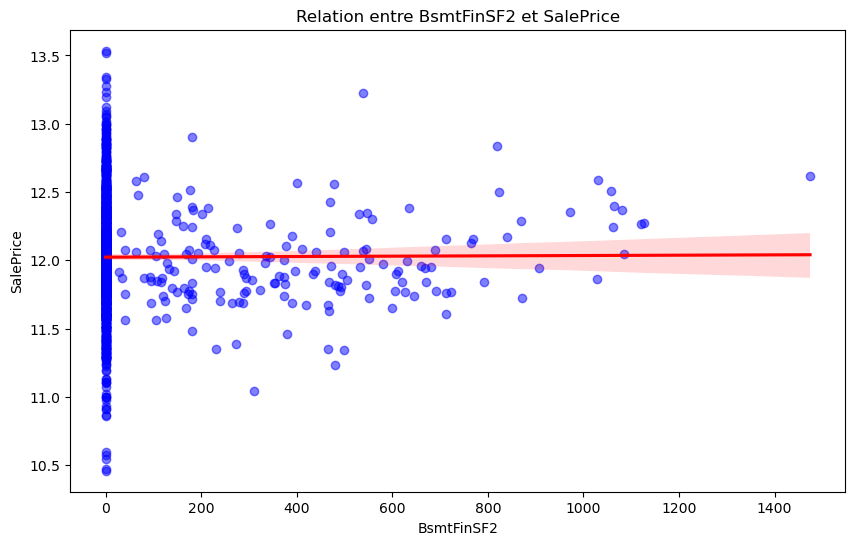

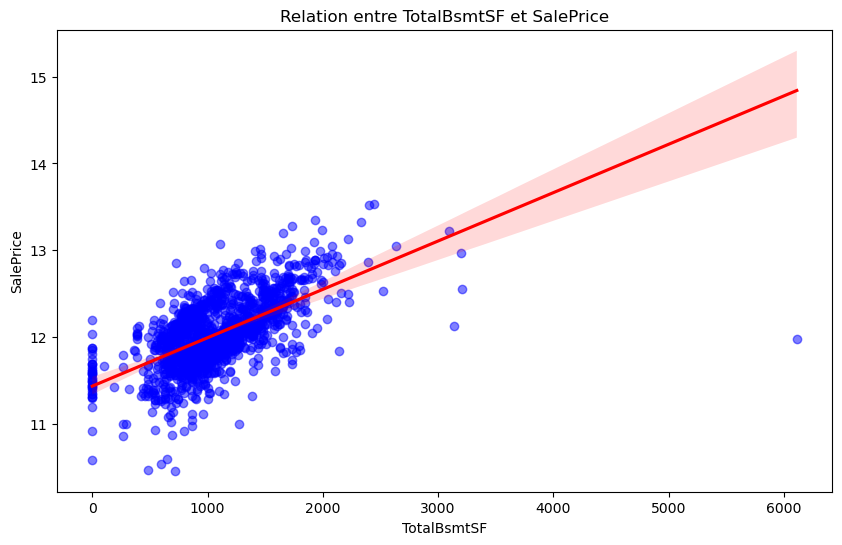

In [63]:
#TODO
for column in df.columns:
    if column != 'SalePrice' and column not in object_col:
        plot_line(column)

Les graphiques précédents représentent la relation entre la variable étudiée et tous les attributs du jeux de données. 
Cette représentation visuelle des données nous permet de déceler la présence de certaines valeurs aberrantes. 
Dans la relation entre LotArea et SalePrice, on remarque plusieurs données possédant des valeurs très élevé pour LotArea.
Ces points peuvent être considéré comme des données abberantes car ont un impact considérable sur la pente de la droite de régression.
Ensuite, on remarque un point aberrant au niveau de la relation entre TotalBsmtSF et SalePrice et au niveau de la relation entre BsmtFinSF2 et SalePrice.

## 3. Transformation des données (10 points)

### 3.1 Encodage des attributs de type `object`

Les attributs de type `object` étant catégoriques (voire partie 1), on peut effectuer un `one hot encoding` de ces attributs. `Pandas` permet d'effectuer cela avec la fonction `get_dummies()`. Cela nous permettra d'obtenir un dataset contenant uniquement des attributs de type `int` ou `float`.


#### 3.1.1 Question 8 (5 points)

**Encodez les attributs de type `object` avec un `one hot encoding`**

In [64]:
#TODO
df = pd.get_dummies(df, drop_first=True)
display(df)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,12.247699,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,12.109016,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,12.317171,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,11.849405,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,12.429220,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2915,160,1894,5,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2916,20,20000,7,1960,1996,0.0,1224.0,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0
2917,85,10441,5,1992,1992,0.0,912.0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0


### 3.2 Normalisation des données

Pour faciliter l'entraînement du modèle, on peut normaliser les données. `sklearn` permet d'effectuer cela avec les fonctions suivantes :

*   `StandardScaler()` normalise les données en soustrayant la moyenne et en divisant par l'écart-type
*   `MinMaxScaler()` normalise les données en les ramenant entre 0 et 1.

Dans la suite de ce TP, nous utiliserons la fonction `StandardScaler()`.

In [65]:
# A utiliser dans la partie 6.2
mu_sale_price = df["SalePrice"].mean()
sigma_sale_price = df["SalePrice"].std()

#### 3.2.1 Question 9 (5 points)

**Implémenter la fonction `normalize`. Elle doit réaliser la normalisation des données.**

In [66]:
from sklearn.preprocessing import StandardScaler

def normalize(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """

    numeric_columns = dataset.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])


    return dataset

In [67]:
from sklearn.preprocessing import MinMaxScaler

def normalize_minmax(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns

    scaler = MinMaxScaler()

    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])


    return dataset

In [68]:
df = normalize(df)
display(df)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560067,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212763,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437383,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2915,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2916,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2917,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.223848,-0.094899,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


## 4. Sélection des attributs corrélées (15 points)

### 4.1 Suppression des attributs corrélées

Pour améliorer la qualité de la prédiction, nous devons prendre en compte la corrélation entre attributs. L'objectif est donc de supprimer les attributs les plus fortement corrélées entre eux.

Pour ce faire, vous disposez des fonctions suivantes

* `corr()` de `Pandas` qui calcule la matrice de corrélation
* `heatmap()` de `seaborn` qui permet de visualiser la matrice de corrélation


#### 4.1.1 Question 10 (10 points)

**Implémenter la fonction `display_corr_matrix`. Elle doit permettre d'afficher la matrice de corrélation entre les différents attributs de nos données après normalisation des données.**

In [82]:
def display_corr_matrix(dataset):
    """
    Créer et affiche la matrice de corrélation des attributs liés au dataset.

    :param dataset: ensemble des données
    """
    corr_matrix = dataset.corr()
    
    pylt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=1)
    pylt.title('Matrice de Corrélation des Attributs')
    pylt.show()

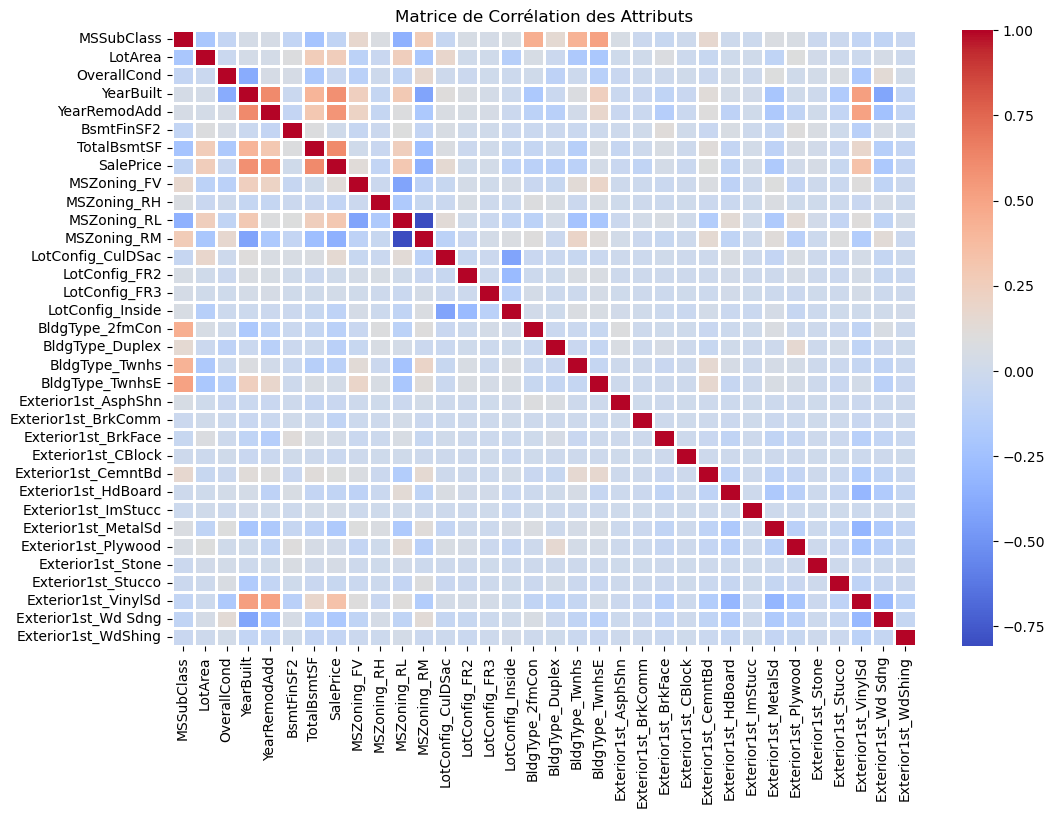

In [83]:
display_corr_matrix(df)

#### 4.1.2 Question 11 (5 points)

On peut alors choisir de supprimer les attributs qui sont fortement corrélées entre eux en définissant un seuil. Fixons ce seuil à 0.7.

**Quels sont les attributs fortement correlés selon le critère ci-dessus ? Supprimez ces attributs et affichez la nouvelle matrice de corrélation.**

In [88]:
#TODO
corr_matrix = df.corr()
threshold = 0.7
to_drop = set()

corr_with_saleprice = corr_matrix['SalePrice'].abs()

for i in range(1, len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                
                if corr_with_saleprice[col_i] > corr_with_saleprice[col_j]:
                    to_drop.add(col_i)
                else:
                    to_drop.add(col_j)

print(to_drop)

df = df.drop(columns=to_drop)
display(df)


{'MSZoning_RM'}


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560067,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212763,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437383,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2915,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2916,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2917,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.223848,-0.094899,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


## 5. Récapitulatif des prétraitements

<img src=" 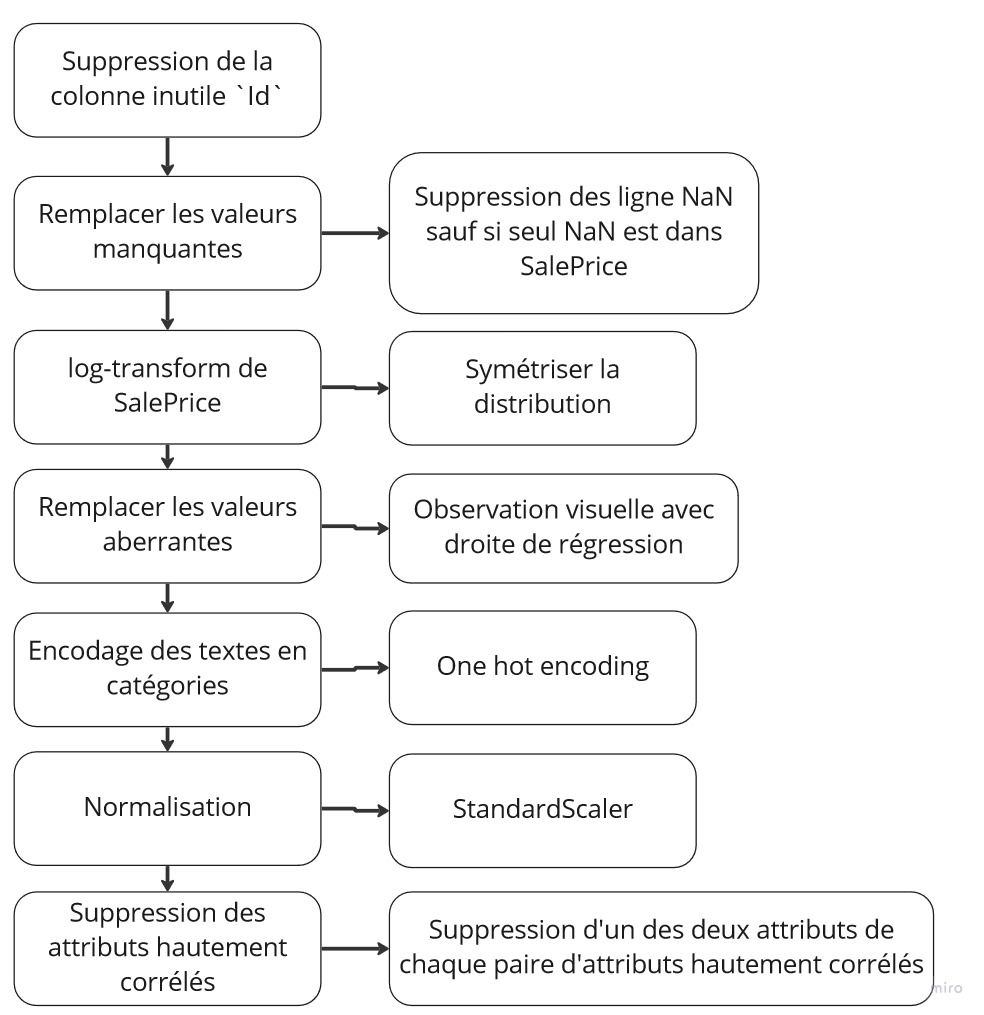" height="600px">

## 6. Entrainement d'un modèle de régression linéaire (30 points)

### 6.1 Rappel du concept

La régression linéaire consiste à trouver une fonction affine qui minimise la somme des carrés des erreurs. La fonction affine est définie par la formule suivante :
$$ f(x) = \beta_0 + \beta_1^T x $$
Nous tentons de trouver les paramètres $\beta_0$ et $\beta_1$ qui minimisent $\sum_{i=1}^n (f(x_i) - y_i)^2=||y-X\beta||^2$ où $X$ est la matrice des données fournies au modèle et $y$ le vecteur des `SalePrice`.

On veut trouver le minimum de cette fonction. On va utiliser `RidgeRegression` de `sklearn` pour trouver les paramètres $\beta_0$ et $\beta_1$. Ce module utilise la méthode des moindres carrés (`numpy.linalg.lstsq`) pour trouver les paramètres $\beta_0$ et $\beta_1$.

### 6.2 Application

#### 6.2.1 Question 12 (5 points)

Après avoir effectué le prétraitement, on peut commencer par séparer les données en un ensemble d'entraînement et un ensemble de test. Pour cela, les 1460 premières lignes contiennent les données d'entrainement. On peut ainsi séparer les données en deux ensembles.

**Compléter la structure suivante afin de diviser les données en deux sous-ensembles.**

In [89]:
df_train = df.dropna(subset=['SalePrice'])
df_pred = df[df['SalePrice'].isnull()]  

X_train = df_train.drop(columns=['SalePrice'])
y_train = df_train['SalePrice']

X_pred = df_pred.drop(columns=['SalePrice'])

data_train = {"x": X_train, "y": y_train, "df": df_train}
data_pred = {"x": X_pred, "df": df_pred}

#### 6.2.2 Question 13 (7.5 points)

Une fois cette scission faite, on peut utiliser `RidgeRegression` pour effectuer la régression linéaire avec pénalisation de la norme L2.

**Compléter la fonction `ridge_regression`. Elle doit implémenter l'ensemble de la régression.**

*Pour cette question, vous devez retourner les coefficients de la regression linéaire. De plus, ce fonction doit modifier le paramètre `data_pred` en y ajoutant les valeurs prédites. Il est aussi nécéssaire de prendre en compte certaines modifications effectuées lors de la transformation des données*

In [90]:
def ridge_regression(data_train, data_pred):
    """
    Réaliser la prédiction selon la régression de Rigde.

    :param data_train: données d'entrainement
    :param data_pred: données de prédiction
    :return:
      coefficients de la régression
    """
    ridge = linear_model.Ridge(alpha=1.0)
    ridge.fit(data_train['x'], data_train['y'])
    data_pred['y'] = ridge.predict(data_pred['x'])
    
    return ridge.coef_

    

In [106]:
ridge_coef = ridge_regression(data_train, data_pred)
print(f"Longueur de la liste de coefficients: {len(ridge_coef)}")
print(f"Nombre de colonnes dans la matrice X: {len(X_train.columns)}")
print("Coefficients de la Régression Ridge:")
print(data_pred["y"])

Longueur de la liste de coefficients: 32
Nombre de colonnes dans la matrice X: 32
Coefficients de la Régression Ridge:
[-0.68368708 -0.13216452  0.53704343 ...  0.22378263  0.5199317
  0.33790179]


#### 6.2.3 Question 14 (5 points)

**Comparer la distribution des données prédites avec celles d'entrainement.**

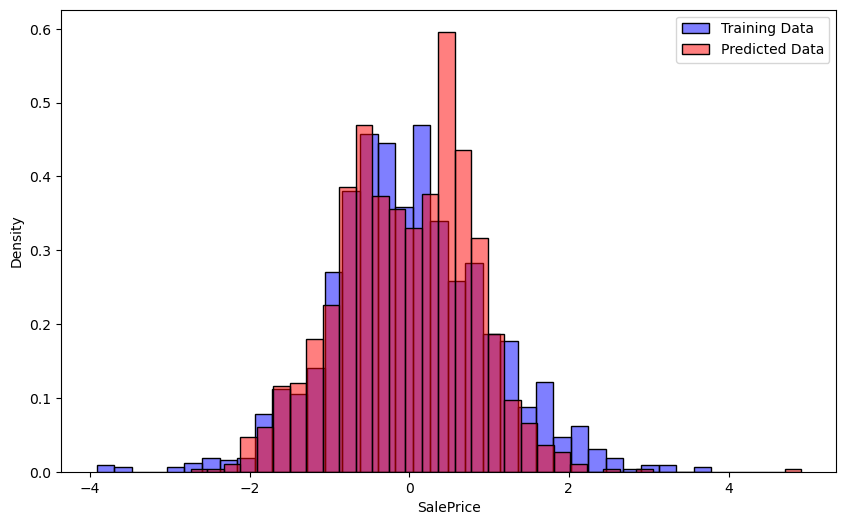

In [109]:
#TODO
pylt.figure(figsize=(10, 6))
sns.histplot(data_train['y'], color='blue', stat='density', label='Training Data', alpha=0.5)
sns.histplot(data_pred['y'], color='red', stat='density', label='Predicted Data', alpha=0.5)

pylt.legend()
pylt.show()

### 6.3. Sélection des attributs importants
#### 6.3.1 Question 15 (5 points)

Une fois la prédiction obtenue, on peut maintenant mesurer l'importance de chaque attribut dans la prédicition en traçant les coefficients de la régression linéaire.

**Quels sont les dix attributs ayant le plus d'impact dans la prédiction ?**


In [112]:
#TODO
coefficients_feature = dict(zip(data_train["x"].columns, ridge_coef))
sorted_coefficients = dict(sorted(coefficients_feature.items(), key=lambda item: abs(item[1]), reverse=True))
for key, value in list(sorted_coefficients.items())[:10]:
    print(f"{key}: {value}")

MSSubClass: 0.4959522215361991
TotalBsmtSF: 0.4515813198118819
YearBuilt: 0.3499236918136262
BldgType_TwnhsE: -0.3457161829572354
BldgType_Twnhs: -0.3014640915131827
BldgType_2fmCon: -0.2294037440106976
YearRemodAdd: 0.19949861886536552
BldgType_Duplex: -0.15916981357893728
OverallCond: 0.13276492377563925
MSZoning_RL: 0.12613409599663133


#### 6.3.2 Question 16 (7.5 points)

Cette dernière méthode n'est pas nécessairement une bonne mesure de l'importance d'un attribut. On peut utiliser la méthode SHAP (SHapley Additive exPlanations) pour effectuer la sélection des attributs.

**Les dix attributs ayant le plus d'impact dans la prédiction pour cette mesure sont-ils les mêmes que ceux de la question précédente ? Donnez une interprétation comparative de ces deux résultats**


In [115]:
#TODO
import shap

ridge_reg = linear_model.Ridge(alpha=1.0)
ridge_reg = ridge_reg.fit(data_train['x'], data_train['y'])

explainer = shap.LinearExplainer(ridge_reg, data_train['x'])
shap_values = explainer(data_pred['x'])

shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_importance_feature = dict(zip(X_train.columns, shap_importance))
sorted_shap_importance = dict(sorted(shap_importance_feature.items(), key=lambda item: item[1], reverse=True))

for key, value in list(sorted_shap_importance.items())[:10]:
    print(f"{key}: {value}")



MSSubClass: 0.373481772893431
TotalBsmtSF: 0.3421021136522731
YearBuilt: 0.29314065877458223
YearRemodAdd: 0.18343268126510306
BldgType_TwnhsE: 0.1656482423203722
BldgType_Twnhs: 0.10856123907734001
MSZoning_RL: 0.09995608510987003
OverallCond: 0.09960995557128793
BldgType_Duplex: 0.07154509347744302
BldgType_2fmCon: 0.06434368634821601


Pour les deux méthodes, on obtient les mêmes 3 premiers attributs, soit MSSubClass, TotalBsmtSF et YearBuilt. 
Cependant, on observe des différences dans la suite du classement. Les valeurs BldgType_TwnhsE et BldgType_Twnhs
qui se retrouvent en 4e et 5e position par valeur de coefficient apparaissent en 5e et 6e position au niveau
de la métrique SHAP. En effet, la valeur YearRemodAdd occupe la 4e position selon la méthode SHAP. On observe également des
différences notables vers la fin du classement. Cependant, même si l'ordre change, on retrouve les 10 même valeurs dans les
deux classements. Les différences sont du au fait que SHAP orebd eb cinote kes effects d'interaction et les contributions spécifiques
des attributs aux prédictions du modèle.

## 7. Méthode des écarts interquartiles ou IRQ (10 points)

On peut également détecter les valeurs aberrantes en affichant un boxplot de chaque colonne. `Plotly` considère les valeurs aberrantes comme des outliers si elles sont situées en dehors de l'intervalle [Q1 - α * IQR, Q3 + α * IQR] où
* Q1 et Q3 sont les quantiles 25% et 75%,
* IQR l'intervalle interquartile (Q3 - Q1)
* α le facteur d'ajustement.

On exclut `SalePrice` car les seules valeurs manquantes de cet attribut sont celles du dataset de test.

### 7.1 Question 17 (5 points)

**A quelle valeur fixer le facteur d'ajustement α ? Combien y-a-t-il alors de données aberrantes pour chaque attribut ?**

Dans notre cas, on observe une variance importante au niveau de notre jeu de données, il faut donc ajuster la valeur de alpha de façon à éviter une identification excessive de valeurs aberrantes. De plus, nous n'avons pas un immense jeu de données. Il faut donc opter pour une valeur de alpha qui n'est pas trop restrictive. Plus on opte pour une grande valeur de alpha, plus on est tolérant par rapport à nos données. Le standard pour alpha est de 1.5 mais dans notre situation, un alpha de 2.0 me semble cohérent.

In [161]:
#TODO
alpha = 2.0
outliers_dict = {}
df_numerals = df.select_dtypes(include=['float64'])

def detect_outliers(df, alpha):
    outlier_counts = {}
    outlier_bounds = {}
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - alpha * IQR
        upper_bound = Q3 + alpha * IQR
        
        outlier_bounds[column] = (lower_bound, upper_bound)
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    
    return outlier_counts, outlier_bounds

outlier_counts, outlier_bounds = detect_outliers(df_numerals, alpha)

print("Données aberrantes pour chaque attribut:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} valeurs aberrantes")

Données aberrantes pour chaque attribut:
MSSubClass: 78 valeurs aberrantes
LotArea: 92 valeurs aberrantes
OverallCond: 57 valeurs aberrantes
YearBuilt: 0 valeurs aberrantes
YearRemodAdd: 0 valeurs aberrantes
BsmtFinSF2: 347 valeurs aberrantes
TotalBsmtSF: 22 valeurs aberrantes
SalePrice: 10 valeurs aberrantes
MSZoning_FV: 139 valeurs aberrantes
MSZoning_RH: 26 valeurs aberrantes
MSZoning_RL: 649 valeurs aberrantes
LotConfig_CulDSac: 176 valeurs aberrantes
LotConfig_FR2: 85 valeurs aberrantes
LotConfig_FR3: 13 valeurs aberrantes
LotConfig_Inside: 0 valeurs aberrantes
BldgType_2fmCon: 62 valeurs aberrantes
BldgType_Duplex: 109 valeurs aberrantes
BldgType_Twnhs: 96 valeurs aberrantes
BldgType_TwnhsE: 227 valeurs aberrantes
Exterior1st_AsphShn: 2 valeurs aberrantes
Exterior1st_BrkComm: 6 valeurs aberrantes
Exterior1st_BrkFace: 87 valeurs aberrantes
Exterior1st_CBlock: 1 valeurs aberrantes
Exterior1st_CemntBd: 126 valeurs aberrantes
Exterior1st_HdBoard: 442 valeurs aberrantes
Exterior1st_Im

### 7.2 Question 18 (5 points)

**Traitez les données aberrantes identifiées à la question précédantes. Quel traitement appliquer ?**

Il y a plusieurs solutions afin de gérer les valeurs aberrantes. Par exemple, on peut simplement supprimer les valeurs aberrantes. On peut aussi les transformer par exemple en utilisant une transformation logarithmique qui permet de réduire l'impact des données aberrantes et favorise une distribution normale. Finalement, on peut les imputer, soit remplacer les valeurs par des valeurs statistiques tel que la moyenne ou la médiane.

In [165]:
#TODO
def remove_outliers(df, outlier_bounds):
    df_cleaned = df.copy()
    
    for column, (lower_bound, upper_bound) in outlier_bounds.items():
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

def replace_outliers(df, outlier_bounds):
    df_replaced = df.copy()
    
    for column, (lower_bound, upper_bound) in outlier_bounds.items():
        median_value = df[column].median()
        df_replaced[column] = np.where((df_replaced[column] < lower_bound) | (df_replaced[column] > upper_bound), median_value, df_replaced[column])
    
    return df_replaced

df_cleaned = remove_outliers(df, outlier_bounds)
display(df_cleaned)

df_replaced = replace_outliers(df, outlier_bounds)
display(df_replaced)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560067,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
5,-0.169058,0.507880,-0.511162,0.714252,0.512217,-0.293353,-0.584162,-0.384287,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
6,-0.874430,-0.006853,-0.511162,1.077845,0.991572,-0.293353,1.440346,1.529000,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
13,-0.874430,0.065677,-0.511162,1.143953,1.087443,-0.293353,1.003599,1.293984,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,0.066066,0.102964,-0.511162,0.747306,0.464282,-0.293353,0.387147,1.216642,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1433,0.066066,0.015749,-0.511162,0.945629,0.751894,-0.293353,-0.265700,0.280819,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1447,0.066066,-0.017579,-0.511162,0.780360,0.560152,-0.293353,0.380323,0.912421,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1453,-0.874430,0.903985,-0.511162,1.143953,1.039507,-0.293353,0.198345,-1.701772,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560067,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212763,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437383,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2915,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2916,-0.874430,-0.087810,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2917,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


In [166]:
outlier_counts, outlier_bounds = detect_outliers(df_replaced.select_dtypes(include=['float64'])
, alpha)

print("Données aberrantes pour chaque attribut:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} valeurs aberrantes")

Données aberrantes pour chaque attribut:
MSSubClass: 0 valeurs aberrantes
LotArea: 11 valeurs aberrantes
OverallCond: 0 valeurs aberrantes
YearBuilt: 0 valeurs aberrantes
YearRemodAdd: 0 valeurs aberrantes
BsmtFinSF2: 0 valeurs aberrantes
TotalBsmtSF: 1 valeurs aberrantes
SalePrice: 0 valeurs aberrantes
MSZoning_FV: 0 valeurs aberrantes
MSZoning_RH: 0 valeurs aberrantes
MSZoning_RL: 0 valeurs aberrantes
LotConfig_CulDSac: 0 valeurs aberrantes
LotConfig_FR2: 0 valeurs aberrantes
LotConfig_FR3: 0 valeurs aberrantes
LotConfig_Inside: 0 valeurs aberrantes
BldgType_2fmCon: 0 valeurs aberrantes
BldgType_Duplex: 0 valeurs aberrantes
BldgType_Twnhs: 0 valeurs aberrantes
BldgType_TwnhsE: 0 valeurs aberrantes
Exterior1st_AsphShn: 0 valeurs aberrantes
Exterior1st_BrkComm: 0 valeurs aberrantes
Exterior1st_BrkFace: 0 valeurs aberrantes
Exterior1st_CBlock: 0 valeurs aberrantes
Exterior1st_CemntBd: 0 valeurs aberrantes
Exterior1st_HdBoard: 0 valeurs aberrantes
Exterior1st_ImStucc: 0 valeurs aberrante

Comme on peut voir la méthode d'imputation des données a permis de retirer toutes les valeurs aberrantes sans pour autant réduire la taille de notre dataset. La méthode de suppression des données peut également être envisageable, cependant elle réduit considérablement la taille du dataset.